In [ ]:
training_data_directory = '/content/gdrive/MyDrive/soilpicsData/soil_train'
test_data_directory = '/content/gdrive/MyDrive/soilpicsData/soil_valid'

In [ ]:
import os
import re
import cv2
import time
import shutil
import zipfile
import urllib.request
import numpy as np
import cv2
import re
from PIL import Image
from os import listdir
from os.path import isfile, join
from random import randrange
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("/content/gdrive/MyDrive/soilpicsData")
ds_train = tf.keras.preprocessing.image_dataset_from_directory ("/content/gdrive/MyDrive/soilpicsData/soil_train", validation_split=0.01,subset="training",seed=123)
ds_validation = tf.keras.preprocessing.image_dataset_from_directory ("/content/gdrive/MyDrive/soilpicsData/soil_valid", validation_split=0.99,subset="validation",seed=123)


Found 628 files belonging to 3 classes.
Found 492 files belonging to 4 classes.
Using 488 files for training.
Found 136 files belonging to 4 classes.
Using 134 files for validation.


In [ ]:
# Initiate data processing tools
training_data_processor = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    zoom_range = 0.2,
    rotation_range = 10,
    shear_range = 0.2,
    height_shift_range = 0.1,
    width_shift_range = 0.1
)

test_data_processor = ImageDataGenerator(rescale = 1./255)

# Load data into Python
training_data = training_data_processor.flow_from_directory(
    training_data_directory,
    target_size = (256, 256),
    batch_size = 64,
    class_mode = 'categorical',
)

testing_data = test_data_processor.flow_from_directory(
    test_data_directory,
    target_size = (256 ,256),
    batch_size = 64,
    class_mode = 'categorical',
    shuffle = False
)

Found 492 images belonging to 4 classes.
Found 136 images belonging to 4 classes.


In [ ]:
# choose model parameters
num_conv_layers = 2
num_dense_layers = 1
layer_size = 128
num_training_epochs = 20
MODEL_NAME = 'soil'

Epoch 1/20
8/8 [==============================] - 316s 38s/step - loss: 7.4239 - accuracy: 0.3537 - val_loss: 1.6053 - val_accuracy: 0.3750
Epoch 2/20
8/8 [==============================] - 269s 34s/step - loss: 1.1086 - accuracy: 0.4370 - val_loss: 1.9617 - val_accuracy: 0.3456
Epoch 3/20
8/8 [==============================] - 279s 36s/step - loss: 1.0257 - accuracy: 0.4817 - val_loss: 1.8658 - val_accuracy: 0.2353
Epoch 4/20
8/8 [==============================] - 271s 33s/step - loss: 1.0136 - accuracy: 0.4980 - val_loss: 1.8091 - val_accuracy: 0.3309
Epoch 5/20
8/8 [==============================] - 264s 33s/step - loss: 0.9927 - accuracy: 0.5407 - val_loss: 1.0590 - val_accuracy: 0.5294
Epoch 6/20
8/8 [==============================] - 318s 40s/step - loss: 0.9381 - accuracy: 0.5915 - val_loss: 1.4399 - val_accuracy: 0.4044
Epoch 7/20
8/8 [==============================] - 263s 32s/step - loss: 0.9009 - accuracy: 0.5976 - val_loss: 1.4867 - val_accuracy: 0.5147
Epoch 8/20
8/8 [====

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/20
8/8 [==============================] - 263s 32s/step - loss: 0.7064 - accuracy: 0.6829 - val_loss: 1.5145 - val_accuracy: 0.5221
Epoch 2/20
8/8 [==============================] - 270s 33s/step - loss: 0.7161 - accuracy: 0.6768 - val_loss: 2.3153 - val_accuracy: 0.3971
Epoch 3/20
8/8 [==============================] - 287s 36s/step - loss: 0.8060 - accuracy: 0.6524 - val_loss: 1.5116 - val_accuracy: 0.4779
Epoch 4/20
8/8 [==============================] - 315s 41s/step - loss: 0.7572 - accuracy: 0.6687 - val_loss: 1.5001 - val_accuracy: 0.5074
Epoch 5/20
8/8 [==============================] - 282s 37s/step - loss: 0.7360 - accuracy: 0.6829 - val_loss: 1.7638 - val_accuracy: 0.5074
Epoch 6/20
8/8 [==============================] - 291s 37s/step - loss: 0.7085 - accuracy: 0.6972 - val_loss: 2.6546 - val_accuracy: 0.4559
Epoch 7/20
8/8 [==============================] - 261s 32s/step - loss: 0.7081 - accuracy: 0.6789 - val_loss: 1.6358 - val_accuracy: 0.5368
Epoch 8/20
8/8 [====

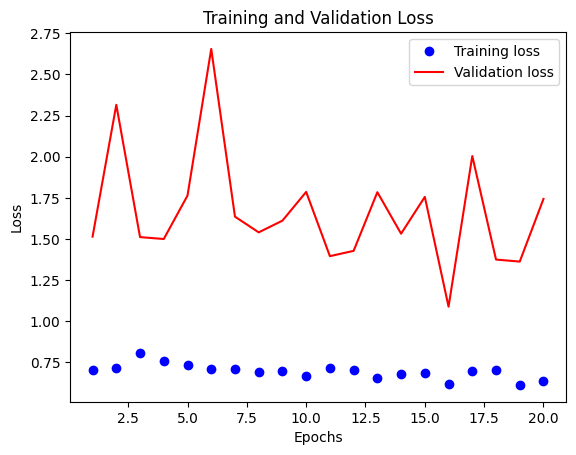

In [ ]:
# Initiate model variable
model = Sequential()

# begin adding properties to model variable
# e.g. add a convolutional layer
model.add(Conv2D(layer_size, (3, 3), input_shape=(256,256, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# add additional convolutional layers based on num_conv_layers
for _ in range(num_conv_layers-1):
    model.add(Conv2D(layer_size, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

# reduce dimensionality
model.add(Flatten())

# add fully connected "dense" layers if specified
for _ in range(num_dense_layers):
    model.add(Dense(layer_size))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

# add output layer
model.add(Dense(4))
model.add(Activation('softmax'))

# compile the sequential model with all added properties
model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'],
                )

# use the data already loaded previously to train/tune the model
model.fit(training_data,
            epochs=num_training_epochs,
            validation_data = testing_data)

# save the trained model
model.save(f'{MODEL_NAME}.h5')

# Train the model and store the training history
history = model.fit(training_data, epochs=num_training_epochs, validation_data=testing_data)

# Extracting loss data from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the graph
epochs = range(1, num_training_epochs + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
def make_prediction(image_fp):
    im = cv2.imread(image_fp) # load image
    plt.imshow(im[:,:,[2,1,0]])
    img = image.load_img(image_fp, target_size = (256,256))
    img = image.img_to_array(img)

    image_array = img / 255. # scale the image
    img_batch = np.expand_dims(image_array, axis = 0)

    class_ = ["clayeysoil", "sandysoil", "loamsoil"] # possible output values
    predicted_value = class_[model.predict(img_batch).argmax()]
    true_value = re.search(r'(clayeysoil)|(sandysoil)|(loamsoil)', image_fp)[0]

    out = f"""Predicted Soil Type: {predicted_value}
    True Soil Type: {true_value}
    Correct?: {predicted_value == true_value}"""

    return out

In [ ]:
# Ensure necessary modules are installed and imported
!pip install opencv-python



clayeysoil  loamsoil  redsoil  sandysoil
1/1 [==============================] - 0s 474ms/step
Predicted Soil Type: sandysoil
    True Soil Type: sandysoil
    Correct?: True


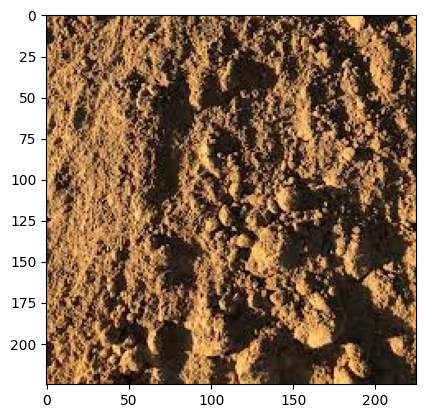

In [ ]:
# Check if the image file exists
!ls {'/content/gdrive/MyDrive/soilpicsData/soil_valid'}


# Load the image using cv2.imread
im = cv2.imread('/content/gdrive/MyDrive/soilpicsData/soil_valid/sandysoil/Farr_s Landscape Supply and Sod _ Belton_ Temple__y.jpg')

# Check if the image is valid
if im is None:
    print("Error: Could not load image file.")
else:
    # Continue with your prediction logic
    print(make_prediction('/content/gdrive/MyDrive/soilpicsData/soil_valid/sandysoil/Farr_s Landscape Supply and Sod _ Belton_ Temple__y.jpg'))

clayeysoil  loamsoil  redsoil  sandysoil
/content/gdrive/MyDrive/soilpicsData/soil_valid: directory


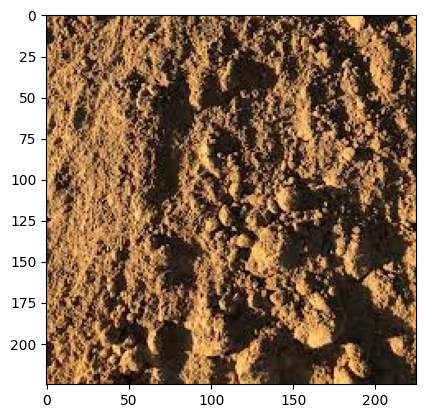

In [ ]:
!ls {'/content/gdrive/MyDrive/soilpicsData/soil_valid'}
!file {'/content/gdrive/MyDrive/soilpicsData/soil_valid'}
im = cv2.imread('/content/gdrive/MyDrive/soilpicsData/soil_valid/sandysoil/Farr_s Landscape Supply and Sod _ Belton_ Temple__y.jpg')
plt.imshow(im[:,:,[2,1,0]])

In [ ]:
def split_images(image_dir, save_dir):
    classification_list = ['clayeysoil', 'sandysoil', 'loamsoil']
    for classification in classification_list:
        folder = image_dir + '/' + classification + '/'
        save_folder = save_dir + '/' + classification + '/'
        files = [f for f in listdir(folder) if isfile(join(folder, f))]

        for file in files:
            if '.ini' in file:
                continue
            fp = folder + file
            img = cv2.imread(fp)
            h,w,c = img.shape
            im_dim = 64
            # For cropping images
            for r in range(0,img.shape[0],im_dim):
                for c in range(0,img.shape[1],im_dim):
                    cropped_img = img[r:r+im_dim, c:c+im_dim,:]
                    ch, cw, cc = cropped_img.shape
                    if ch == im_dim and cw == im_dim:
                        write_path = f"{save_folder + str(randrange(100000))}img{r}_{c}.jpg"
                        cv2.imwrite(write_path,cropped_img)
                    else:
                        pass

In [ ]:

parent = "/content/gdrive/MyDrive/soilpicsData/soil_"



# Check if the directory to be created already exists
dir = "train_divided"
if os.path.exists(os.path.join(parent, dir)):
    # Either delete the existing directory or change the name of the new directory
    # os.rmdir(os.path.join(parent, dir))
    dir = "new_directory_name"


In [ ]:
model_fp = os.getcwd()+'/'+'soil.h5'
print(model_fp)
model = load_model(model_fp)

/content/soil.h5


In [ ]:
def classify_images(image_fp, model):
    classes = ['clayeysoil', 'sandysoil', 'loamsoil']
    gravel_count = 0
    sand_count = 0
    silt_count = 0

    img = cv2.imread(image_fp)
    img = cv2.resize(img,(1024,1024))
    im_dim = 256

    for r in range(0, img.shape[0], im_dim):
        for c in range(0, img.shape[1], im_dim):
            cropped_img = img[r:r + im_dim, c:c + im_dim, :]
            h, w, c = cropped_img.shape
            if h == im_dim and w == im_dim:
                classification = model_classify(cropped_img, model)
                if classification == classes[0]:
                    gravel_count += 1
                elif classification == classes[1]:
                    sand_count += 1
                elif classification == classes[2]:
                    silt_count += 1
            else:
                continue
    total_count = gravel_count + sand_count + silt_count
    proportion_array = [gravel_count / total_count, sand_count / total_count, silt_count / total_count]
    return proportion_array


def model_classify(cropped_img, model):
    classes = ['clayeysoil', 'sandysoil', 'loamsoil']
    image_array = cropped_img / 255.
    img_batch = np.expand_dims(image_array, axis=0)
    prediction_array = model.predict(img_batch)[0]
    first_idx = np.argmax(prediction_array)
    first_class = classes[first_idx]
    return first_class

def classify_percentage(image_fp):
    start = time.time()
    out = classify_images(image_fp=image_fp, model=model)
    finish = str(round(time.time() - start, 5))

    im = cv2.imread(image_fp) # load image
    plt.imshow(im[:,:,[2, 1, 0]])

    print(f'''---
Percent clayeysoil: {round(out[0] * 100, 2)}%)
Percent Sandysoil: {round(out[1] * 100, 2)}%)
Percent loamsoil: {round(out[2] * 100, 2)}%)
Time to Classify: {finish} seconds
---''')

1/1 [==============================] - 0s 191ms/step
---
Percent clayeysoil: 43.75%)
Percent Sandysoil: 56.25%)
Percent loamsoil: 0.0%)
Time to Classify: 4.63521 seconds
---


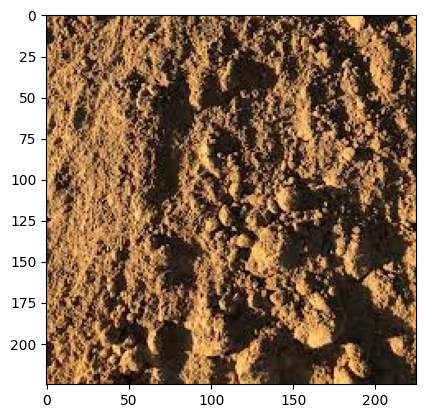

In [ ]:
classify_percentage('/content/gdrive/MyDrive/soilpicsData/soil_valid/sandysoil/Farr_s Landscape Supply and Sod _ Belton_ Temple__y.jpg')
